In [1]:
pip install gammaALPs

     -------------------------------------- 59.4/59.4 kB 348.8 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 6.4/6.4 MB 11.0 MB/s eta 0:00:00
     ---------------------------------------- 9.4/9.4 MB 10.6 MB/s eta 0:00:00
     ------------------------------------- 347.0/347.0 kB 10.9 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 12.4 MB/s eta 0:00:00
  Using cached zipp-3.15.0-py3-none-any.whl (6.8 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ebltable

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numba

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install astropy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip all

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "all" - maybe you meant "install"



In [9]:
pip list

Package            Version
------------------ --------
astropy            4.3.1
asttokens          2.2.1
astunparse         1.6.3
backcall           0.2.0
certifi            2023.5.7
charset-normalizer 3.1.0
colorama           0.4.6
cycler             0.11.0
debugpy            1.6.7
decorator          5.1.1
download           0.3.5
ebltable           0.5.2
entrypoints        0.4
fonttools          4.38.0
gammaALPs          0.3.0
idna               3.4
importlib-metadata 6.7.0
ipykernel          6.16.2
ipython            7.34.0
jedi               0.18.2
jupyter_client     7.4.9
jupyter_core       4.12.0
kiwisolver         1.4.4
llvmlite           0.39.1
matplotlib         3.5.3
matplotlib-inline  0.1.6
mindspore          2.0.0
mkl-fft            1.3.0
mkl-random         1.1.1
mkl-service        2.3.0
nest-asyncio       1.5.6
numba              0.56.4
numpy              1.19.2
packaging          23.1
parso              0.8.3
pickleshare        0.7.5
Pillow             9.4.0
pip          

In [1]:
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base.transfer import EminGeV, EmaxGeV
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c

In [2]:
m, g = 10., 3.
alp = ALP(m, g)

In [3]:
EGeV = np.logspace(0.,8.,1000)
EGeV

array([1.00000000e+00, 1.01861017e+00, 1.03756668e+00, 1.05687597e+00,
       1.07654461e+00, 1.09657929e+00, 1.11698682e+00, 1.13777413e+00,
       1.15894830e+00, 1.18051653e+00, 1.20248614e+00, 1.22486461e+00,
       1.24765955e+00, 1.27087871e+00, 1.29452998e+00, 1.31862140e+00,
       1.34316117e+00, 1.36815763e+00, 1.39361927e+00, 1.41955477e+00,
       1.44597292e+00, 1.47288272e+00, 1.50029332e+00, 1.52821404e+00,
       1.55665436e+00, 1.58562396e+00, 1.61513269e+00, 1.64519059e+00,
       1.67580786e+00, 1.70699493e+00, 1.73876240e+00, 1.77112106e+00,
       1.80408193e+00, 1.83765620e+00, 1.87185529e+00, 1.90669084e+00,
       1.94217468e+00, 1.97831888e+00, 2.01513573e+00, 2.05263775e+00,
       2.09083769e+00, 2.12974854e+00, 2.16938352e+00, 2.20975611e+00,
       2.25088005e+00, 2.29276931e+00, 2.33543814e+00, 2.37890104e+00,
       2.42317279e+00, 2.46826845e+00, 2.51420335e+00, 2.56099310e+00,
       2.60865362e+00, 2.65720111e+00, 2.70665207e+00, 2.75702333e+00,
      

In [4]:
pin = np.diag((1., 0., 0.))
src = Source(z=0., l=0., b=0.)
ml = ModuleList(alp, src, pin=pin, EGeV=EGeV, seed=0)


In [11]:
ml.add_propagation(environ='ICMCell',
                   order=0,   # order of the module
                   B0=2.,  # B field strength
                   L0=10.,  # cell size
                   nsim=1,  # one single realization
                   n0=1e-3,  # electron density
                   r_abell=10.001,  # full path, chosen that we only have a single cell
                   beta=0., 
                   eta=0.
                  )

environs.py: 257 --- INFO: Using inputted chi
environs.py: 270 --- WARNING: r_abell <= L0: assuming one domain from 0. to L0


In [6]:
# Mixing in the intergalactic magnetic field (IGMF)
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt
from ebltable.tau_from_model import OptDepth
from astropy import constants as c

environs.py: 257 --- INFO: Using inputted chi
environs.py: 270 --- WARNING: r_abell <= L0: assuming one domain from 0. to L0
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixICMCell'>


   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixICMCell'>
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixICMCell'>
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixICMCell'>


Text(0, 0.5, 'Photon survial probability')

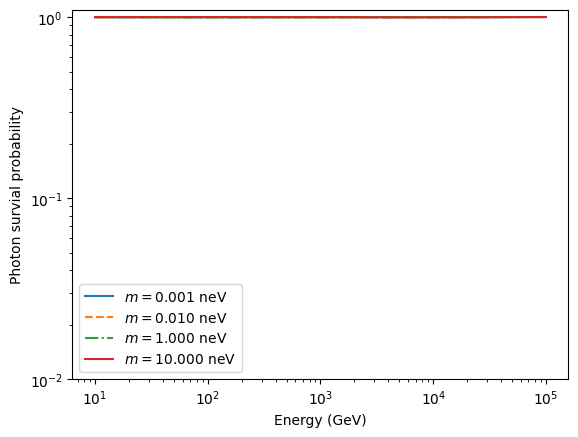

In [34]:
src = Source(z=0.341, ra=0., dec=0.)
EGeV = np.logspace(1., 5., 200)
pin = np.diag((1.,1.,0.)) * 0.5

ml = ModuleList(ALP(m = 1., g = 6.), src, pin=pin, EGeV=EGeV, seed=0)

# homogenous model
ml.add_propagation(environ='ICMCell',
                   order=0,   # order of the module
                   B0=1e-3,  # B field strength
                   L0=1e3,  # cell size
                   nsim=1,  # one single realization
                   n0=1e-7,  # electron density
                   r_abell=1000.01,  # full path, chosen that we only have a single cell
                   beta=0., 
                   eta=0.
                  )

# ml.add_propagation("IGMF", 
#                   0, # position of module counted from the source. 
#                   nsim=1, # number of random B-field realizations
#                   B0=2e-3,  # B field strength in micro Gauss at z = 0
#                   n0=1e-7,  # normalization of electron density in cm^-3 at z = 0
#                   L0=1e3, # coherence (cell) length in kpc at z = 0
#                   eblmodel='dominguez' # EBL model
#                   )

malp = np.array([0.001,0.01, 1., 10.])

px = np.zeros((malp.shape[0], EGeV.shape[0]))
py = np.zeros((malp.shape[0], EGeV.shape[0]))
pa = np.zeros((malp.shape[0], EGeV.shape[0]))

# # calculate the case without photon-ALP mixing
# tau = ml.modules["IGMFCell"].t.opt_depth(ml.source.z, ml.EGeV / 1e3)

# The case with ALPs is computed in a loop over the considered ALP masses.
for i, mi in enumerate(malp):
    ml.alp.m = mi
    px[i], py[i], pa[i] = ml.run()

# plot
ls = ['-','--','-.']

for i, mi in enumerate(malp):
    plt.loglog(EGeV, px[i] + py[i], 
               label='$m = {0:.3f}$ neV'.format(mi),
               ls=ls[i % len(ls)])
    
# plt.loglog(ml.EGeV, np.exp(-tau),
#            label='EBL absorption only',
#            color='k',
#            ls=':')

plt.legend()
plt.gca().set_ylim(1e-2,1.1)
plt.xlabel('Energy (GeV)')
plt.ylabel('Photon survial probability')

In [17]:
# homogeneous model
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base.transfer import EminGeV, EmaxGeV
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c

environs.py: 257 --- INFO: Using inputted chi
environs.py: 270 --- WARNING: r_abell <= L0: assuming one domain from 0. to L0
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixICMCell'>


(1, 10000)


Text(0, 0.5, '$P_{a\\gamma}$')

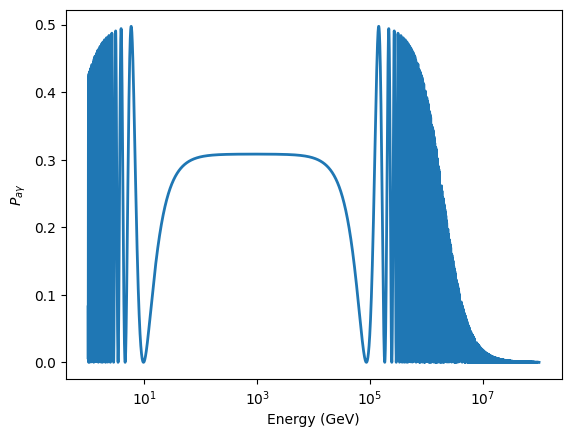

In [50]:
# src = Source(z=0.341, ra=0., dec=0.)
# EGeV = np.logspace(1., 5., 200)
# pin = np.diag((1.,1.,0.)) * 0.5

# ml = ModuleList(ALP(m = 1., g = 6.), src, pin=pin, EGeV=EGeV, seed=0)

m, g = 1., 6.
alp = ALP(m, g)
EGeV = np.logspace(0.,8.,10000)
pin = np.diag((1., 1., 0.)) * 0.5
src = Source(z=0, l=0., b=0.)
ml = ModuleList(alp, src, pin=pin, EGeV=EGeV, seed=0)
# ml.add_propagation(environ='ICMCell',
#                    order=0,   # order of the module
#                    B0=1.,  # B field strength
#                    L0=10.,  # cell size
#                    nsim=1,  # one single realization
#                    n0=1e-3,  # electron density
#                    r_abell=10.001,  # full path, chosen that we only have a single cell
#                    beta=0., 
#                    eta=0.
#                   )

ml.add_propagation(environ='ICMCell',
                   order=0,   # order of the module
                   B0=1.,  # B field strength
                   L0=1e4,  # cell size
                   nsim=1,  # one single realization
                   n0=1e-6,  # electron density
                   r_abell=10000.100,  # full path, chosen that we only have a single cell
                   beta=0., 
                   eta=0.
                  )

ml.modules[0].psin = np.ones_like(ml.modules[0].psin) * np.pi / 2.
px, py, pa = ml.run()
print (pa.shape)


# plot
plt.semilogx(EGeV, pa[0], lw=2)

# # the critical energy, onset of strong mixing regime
# plt.axvline(EminGeV(m_neV=ml.alp.m, g11=ml.alp.g, BmuG=ml.modules[0].B, n_cm3=ml.modules[0].nel),
#             lw=1., ls='--', color='k')

# # maximum energy, end of strong mixing regime
# plt.axvline(EmaxGeV(g11=ml.alp.g, BmuG=ml.modules[0].B),
#             lw=1., ls='-.', color='k')

plt.xlabel("Energy (GeV)")
plt.ylabel("$P_{a\gamma}$")

In [2]:
pip install pandas

     ---------------------------------------- 10.0/10.0 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 502.5/502.5 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt
from ebltable.tau_from_model import OptDepth
from astropy import constants as c
# import pandas as pd
# pd.set_option('display.max_columns', None)    # ��ʾ������
# pd.set_option('display.max_rows', None)  

src = Source(z=0.151, ra=288.2643, dec=19.7712)
numberofengergy=30000
EGeV = np.logspace(-6, 4.,numberofengergy)
pin = np.diag((1.,1.,0.)) * 0.5

ml = ModuleList(ALP(m = 1., g = 6.), src, pin=pin, EGeV=EGeV, seed=0)

ml.add_propagation("IGMF",
                  0, # position of module counted from the source.
                  nsim=1, # number of random B-field realizations
                  B0=1e-3,  # B field strength in micro Gauss at z = 0
                  n0=1e-7,  # normalization of electron density in cm^-3 at z = 0
                  L0=1e3, # coherence (cell) length in kpc at z = 0
                  eblmodel='dominguez' # EBL model
                  )
ml.add_propagation("GMF", 0, model='jansson12')

malp = np.array([0.001,0.01, 1., 10.])

px = np.zeros((malp.shape[0], EGeV.shape[0]))
py = np.zeros((malp.shape[0], EGeV.shape[0]))
pa = np.zeros((malp.shape[0], EGeV.shape[0]))

tau = ml.modules["IGMFCell"].t.opt_depth(ml.source.z, ml.EGeV / 1e3)

for i, mi in enumerate(malp):
    ml.alp.m = mi
    px[i], py[i], pa[i] = ml.run()
    
ls = ['-','--','-.']

for i, mi in enumerate(malp):
    plt.loglog(EGeV, px[i] + py[i],
               label='$m = {0:.3f}$ neV'.format(mi),
               ls=ls[i % len(ls)])

plt.loglog(ml.EGeV, np.exp(-tau),
           label='EBL absorption only',
           color='k',
           ls=':')


plt.legend()
plt.gca().set_ylim(1e-3,1.1)
plt.xlabel('Energy (GeV)')
plt.ylabel('Photon survial probability')

MemoryError: Unable to allocate 3.12 GiB for an array with shape (30000, 775, 3, 3) and data type complex128

environs.py:1196 --- INFO: Using inputted chi
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 652 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixIGMFCell'>
e:\Anaconda\envs\py37\lib\site-packages\gammaALPs\base\transfer.py:799: UserWarning: Not all values of linear polarization are real values!
  warnings.warn("Not all values of linear polarization are real values!")
e:\Anaconda\envs\py37\lib\site-packages\gammaALPs\base\transfer.py:802: UserWarning: Not all values of circular polarization are real values!
  warnings.warn("Not all values of circular polarization are real values!")
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 652 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixIGMFCell'>
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 652 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixIGMFCell

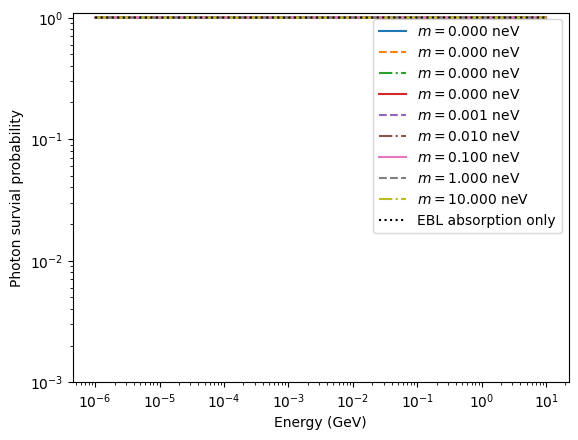

In [5]:
# run in environment "py37" ,main
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt
from ebltable.tau_from_model import OptDepth
from astropy import constants as c
import pandas as pd
pd.set_option('display.max_columns', None)    
pd.set_option('display.max_rows', None)  

# GRB 221009A
#src = Source(z=0.151, ra=288.2643, dec=19.7712)
src = Source(z=0.151, ra='19h13m3.48s', dec='+19d46m24.6s')
numberofengergy=10000
# Insight-HXMT low:-3~1, high:-1~2
EGeV = np.logspace(-6, 1.,numberofengergy)
pin = np.diag((1.,1.,0.)) * 0.5

g = 0.1
ml = ModuleList(ALP(m = 1., g=0.1), src, pin=pin, EGeV=EGeV, seed=0)

ml.add_propagation("IGMF",
                  0, # position of module counted from the source.
                  nsim=1, # number of random B-field realizations
                  B0=1e-3,  # B field strength in micro Gauss at z = 0
                  n0=1e-7,  # normalization of electron density in cm^-3 at z = 0
                  L0=1e3, # coherence (cell) length in kpc at z = 0
                  eblmodel='dominguez' # EBL model
                  )
ml.add_propagation("GMF", 0, model='jansson12')

malp = np.array([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1., 10.])

px = np.zeros((malp.shape[0], EGeV.shape[0]))
py = np.zeros((malp.shape[0], EGeV.shape[0]))
pa = np.zeros((malp.shape[0], EGeV.shape[0]))

tau = ml.modules["IGMFCell"].t.opt_depth(ml.source.z, ml.EGeV / 1e3)

for i, mi in enumerate(malp):
    ml.alp.m = mi
    px[i], py[i], pa[i] = ml.run()
    
ls = ['-','--','-.']

for i, mi in enumerate(malp):
    plt.loglog(EGeV, px[i] + py[i],
               label='$m = {0:.3f}$ neV'.format(mi),
               ls=ls[i % len(ls)])

plt.loglog(ml.EGeV, np.exp(-tau),
           label='EBL absorption only',
           color='k',
           ls=':')

# 转化率写入
filename = "C:\\Users\\Pluto\\Desktop\ALP\\survivalprob\\"+"g="+str(g)+".txt"
datapxy=open(filename,'w')
str_malp=list(map(lambda x:str(x),malp))
str_malp= ' '.join(str_malp)
print("EGeV "+str_malp, file=datapxy)
for i in range(numberofengergy):
    print(EGeV[i],file=datapxy, end=' ')
    for j in range(len(malp)-2):
        print(px[j,i]+py[j,i],file=datapxy,end=" ")
    print(px[len(malp)-1,i]+py[len(malp)-1,i],file=datapxy)
datapxy.close()

# datapxy=open(r"C:\Users\Pluto\Desktop\ALP\survivalprob\EGeV.txt",'w') 
# for i in range(numberofengergy):
#     print(EGeV[i],file=datapxy, end=' ')
#     print(px[:,i]+py[:,i],file=datapxy)
# datapxy.close()

plt.legend()
plt.gca().set_ylim(1e-3,1.1)
plt.xlabel('Energy (GeV)')
plt.ylabel('Photon survial probability')

plt.savefig("C:\\Users\\Pluto\\Desktop\\ALP\\survivalprob\\pic\\"+"g="+str(g)+".jpg", dpi=600)

In [39]:
malp = np.array([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1., 10.])
str_malp=list(map(lambda x:str(x),malp))
str_malp= ' '.join(str_malp)
print(str_malp)

1e-07 1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0


In [42]:
EGeV = np.logspace(-3, 1.,numberofengergy)
malp = np.array([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1., 10.])
print(type(EGeV))
print(type(malp))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
# run in environment "py37"
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt
from ebltable.tau_from_model import OptDepth
from astropy import constants as c
import pandas as pd
pd.set_option('display.max_columns', None)    
pd.set_option('display.max_rows', None)  

# GRB 221009A
#src = Source(z=0.151, ra=288.2643, dec=19.7712)
src = Source(z=0.151, ra='19h13m3.48s', dec='+19d46m24.6s')
numberofengergy=20000
# Insight-HXMT : -6~0, 
EGeV = np.logspace(-6, 0.,numberofengergy)
pin = np.diag((1.,1.,0.)) * 0.5

# g = 6.0
ml = ModuleList(ALP(m = 1.,g=6.0), src, pin=pin, EGeV=EGeV, seed=0)

ml.add_propagation("IGMF",
                  0, # position of module counted from the source.
                  nsim=1, # number of random B-field realizations
                  B0=1e-3,  # B field strength in micro Gauss at z = 0
                  n0=1e-7,  # normalization of electron density in cm^-3 at z = 0
                  L0=1e3, # coherence (cell) length in kpc at z = 0
                  eblmodel='dominguez' # EBL model
                  )
ml.add_propagation("GMF", 0, model='jansson12')

malp = np.logspace(-7, 1.,100) # nGeV
gmalp = np.logspace(-1,1,100)  #1e-11 GeV-1
# malp = np.array([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1., 10.]) # nGeV
# gmalp= np.array([0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  #1e-11 GeV-1


px = np.zeros((gmalp.shape[0], malp.shape[0], EGeV.shape[0]))
py = np.zeros((gmalp.shape[0], malp.shape[0], EGeV.shape[0]))
pa = np.zeros((gmalp.shape[0], malp.shape[0], EGeV.shape[0]))

tau = ml.modules["IGMFCell"].t.opt_depth(ml.source.z, ml.EGeV / 1e3)

for j, gj in enumerate(gmalp):
    for i, mi in enumerate(malp):
        ml.alp.g = gj
        ml.alp.m = mi
        px[j,i], py[j,i], pa[j,i] = ml.run()
# ls = ['-','--','-.']

# for j,gj in enumerate(gmalp):
#     for i, mi in enumerate(malp):
    #     plt.loglog(EGeV, px[j, i] + py[j, i],
    #                label='$m = {0:.3f}$ neV, $g = {1:.1f}$'.format(mi,gj),
    #                ls=ls[i % len(ls)])
    # plt.loglog(ml.EGeV, np.exp(-tau),
    #     label='EBL absorption only',
    #    color='k',
    #    ls=':')
    # plt.legend()
    # plt.gca().set_ylim(1e-3,1.1)
    # plt.xlabel('Energy (GeV)')
    # plt.ylabel('Photon survial probability')
    # plt.savefig("C:\\Users\\Pluto\\Desktop\\ALP\\survivalprob\\pic\\"+"g="+str(gj)+".jpg", dpi=400)
    # plt.clf() #clear
    # 转化率写入
    filename = "C:\\Users\\Pluto\\Desktop\ALP\\survivalprob\\result\\"+"g="+str(gj)+".txt"
    datapxy=open(filename,'w')
    str_malp=list(map(lambda x:str(x),malp))
    str_malp= ' '.join(str_malp)
    print("EGeV "+str_malp, file=datapxy) # print first line
    for a in range(numberofengergy):
        print(EGeV[a],file=datapxy, end=' ')
        for b in range(len(malp)-1):
            print(px[j,b,a]+py[j,b,a],file=datapxy,end=" ")
        print(px[j,len(malp)-1,a]+py[j,len(malp)-1,a],file=datapxy)
    datapxy.close()

# datapxy=open(r"C:\Users\Pluto\Desktop\ALP\survivalprob\EGeV.txt",'w') 
# for i in range(numberofengergy):
#     print(EGeV[i],file=datapxy, end=' ')
#     print(px[:,i]+py[:,i],file=datapxy)
# datapxy.close()

# plt.legend()
# plt.gca().set_ylim(1e-3,1.1)
# plt.xlabel('Energy (GeV)')
# plt.ylabel('Photon survial probability')

# plt.savefig("C:\\Users\\Pluto\\Desktop\\ALP\\survivalprob\\pic1\\"+"g="+str(g)+".jpg", dpi=600)

environs.py:1196 --- INFO: Using inputted chi
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 652 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixIGMFCell'>
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 652 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixIGMFCell'>
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 652 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixIGMFCell'>
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 652 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixIGMFCell'>
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 652 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixIGMFCell'>
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.Mix

MemoryError: Unable to allocate 2.08 GiB for an array with shape (20000, 775, 3, 3) and data type complex128

In [3]:
malp = np.logspace(-7, 1.,100) # nGeV
gmalp = np.logspace(-1,1,100)  #1e-11 GeV-1

(9, 1000)

In [2]:
a=[1,2,3,4]
for i in range(len(a)):
    print(a[len(a)-1])

4
4
4
4


In [4]:
import numpy as np
malp = np.logspace(-7, 1.,9)
print(malp)

[1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


In [ ]:
# run in environment "py37"
# and this is a copy
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt
from ebltable.tau_from_model import OptDepth
from astropy import constants as c
import pandas as pd
pd.set_option('display.max_columns', None)    
pd.set_option('display.max_rows', None)  

# GRB 221009A
#src = Source(z=0.151, ra=288.2643, dec=19.7712)
src = Source(z=0.151, ra='19h13m3.48s', dec='+19d46m24.6s')
numberofengergy=20000
# Insight-HXMT : -6~0, 
EGeV = np.logspace(-6, 0.,numberofengergy)
# try to load data from experiment
filePath_exp = 'C:\\Users\\Pluto\\Desktop\\ALP\\Eexp.xlsx'
Eexp = pd.read_excel(filePath_exp,sheet_name = 'Sheet1')
pin = np.diag((1.,1.,0.)) * 0.5

# g = 6.0
ml = ModuleList(ALP(m = 1.,g=6.0), src, pin=pin, EGeV=EGeV, seed=0)

ml.add_propagation("IGMF",
                  0, # position of module counted from the source.
                  nsim=1, # number of random B-field realizations
                  B0=1e-3,  # B field strength in micro Gauss at z = 0
                  n0=1e-7,  # normalization of electron density in cm^-3 at z = 0
                  L0=1e3, # coherence (cell) length in kpc at z = 0
                  eblmodel='dominguez' # EBL model
                  )
ml.add_propagation("GMF", 0, model='jansson12')

malp = np.logspace(-7, 1.,100) # neV
gmalp = np.logspace(-1,1,100)  #1e-11 GeV-1
# malp = np.array([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1., 10.]) # neV
# gmalp= np.array([0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  #1e-11 GeV-1


px = np.zeros((gmalp.shape[0], malp.shape[0], EGeV.shape[0]))
py = np.zeros((gmalp.shape[0], malp.shape[0], EGeV.shape[0]))
pa = np.zeros((gmalp.shape[0], malp.shape[0], EGeV.shape[0]))

tau = ml.modules["IGMFCell"].t.opt_depth(ml.source.z, ml.EGeV / 1e3)

for j, gj in enumerate(gmalp):
    for i, mi in enumerate(malp):
        ml.alp.g = gj
        ml.alp.m = mi
        px[j,i], py[j,i], pa[j,i] = ml.run()
# ls = ['-','--','-.']

# for j,gj in enumerate(gmalp):
#     for i, mi in enumerate(malp):
    #     plt.loglog(EGeV, px[j, i] + py[j, i],
    #                label='$m = {0:.3f}$ neV, $g = {1:.1f}$'.format(mi,gj),
    #                ls=ls[i % len(ls)])
    # plt.loglog(ml.EGeV, np.exp(-tau),
    #     label='EBL absorption only',
    #    color='k',
    #    ls=':')
    # plt.legend()
    # plt.gca().set_ylim(1e-3,1.1)
    # plt.xlabel('Energy (GeV)')
    # plt.ylabel('Photon survial probability')
    # plt.savefig("C:\\Users\\Pluto\\Desktop\\ALP\\survivalprob\\pic\\"+"g="+str(gj)+".jpg", dpi=400)
    # plt.clf() #clear
    # 转化率写入
    filename = "C:\\Users\\Pluto\\Desktop\ALP\\survivalprob\\result\\"+"g="+str(gj)+".txt"
    datapxy=open(filename,'w')
    str_malp=list(map(lambda x:str(x),malp))
    str_malp= ' '.join(str_malp)
    print("EGeV "+str_malp, file=datapxy) # print first line
    for a in range(numberofengergy):
        print(EGeV[a],file=datapxy, end=' ')
        for b in range(len(malp)-1):
            print(px[j,b,a]+py[j,b,a],file=datapxy,end=" ")
        print(px[j,len(malp)-1,a]+py[j,len(malp)-1,a],file=datapxy)
    datapxy.close()

# datapxy=open(r"C:\Users\Pluto\Desktop\ALP\survivalprob\EGeV.txt",'w') 
# for i in range(numberofengergy):
#     print(EGeV[i],file=datapxy, end=' ')
#     print(px[:,i]+py[:,i],file=datapxy)
# datapxy.close()

# plt.legend()
# plt.gca().set_ylim(1e-3,1.1)
# plt.xlabel('Energy (GeV)')
# plt.ylabel('Photon survial probability')

# plt.savefig("C:\\Users\\Pluto\\Desktop\\ALP\\survivalprob\\pic1\\"+"g="+str(g)+".jpg", dpi=600)

In [2]:
pip install openpyxl

     ------------------------------------ 250.0/250.0 kB 904.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
filePath_exp = 'C:\\Users\\Pluto\\Desktop\\ALP\\Eexp.xlsx'
Eexp = pd.read_excel(filePath_exp,sheet_name = 'Sheet1')
print(type(Eexp))
print(Eexp)

<class 'pandas.core.frame.DataFrame'>
     721.762817
0    751.785767
1    784.597443
2    817.473907
3    850.415131
4    888.934723
5    930.293427
6    974.531708
7   1018.870789
8   1054.983948
9   1091.178955
10  1133.036926
11  1174.989380
12  1217.049805
13  1262.022156
14  1307.109619
15  1355.145081
16  1406.143799
17  1457.288269
18  1511.436462
19  1568.605469
20  1625.954407
21  1683.483215
22  1744.086853
23  1810.689880
24  1883.354370
25  1959.217773
26  2067.793030
27  2215.393433
28  2331.170776
29  2420.810547
30  2525.878296
31  2637.548950
32  2749.818726
33  2865.789551
34  2988.547729
35  3115.130981
36  3264.340698
37  3452.310181
38  3632.188843
39  3797.715332
40  3974.053101
41  4151.776367
42  4350.533691
43  4580.662354
44  4829.624023


In [4]:
# 数据预处理
import pandas as pd
import numpy as np

# 读取 Excel 文件
data = pd.read_excel('C:\\Users\\Pluto\\Desktop\\ALP\\survivalprob\\celestial_data.xlsx')

# 提取第一列和第四列数据
Eexp = np.array(data.iloc[:, 0])  # 第一列数据，索引从0开始
Eerr = np.array(data.iloc[:, 3])  # 第四列数据，索引从0开始

# 显示结果
print("Eexp:", Eexp,)
print("Eerr:", Eerr)
print(len(Eexp))


Eexp: [ 721.76281738  751.7857666   784.59744263  817.47390747  850.41513062
  888.9347229   930.29342651  974.53170776 1018.87078857 1054.98394775
 1091.17895508 1133.03692627 1174.98937988 1217.04980469 1262.02215576
 1307.10961914 1355.14508057 1406.14379883 1457.28826904 1511.4364624
 1568.60546875 1625.95440674 1683.48321533 1744.08685303 1810.68988037
 1883.35437012 1959.21777344 2067.79302979 2215.39343262 2331.17077637
 2420.81054688 2525.8782959  2637.5489502  2749.81872559 2865.78955078
 2988.54772949 3115.13098145 3264.34069824 3452.31018066 3632.18884277
 3797.71533203 3974.05310059 4151.77636719 4350.53369141 4580.66235352
 4829.62402344]
Eerr: [ 13.63330078  16.38964844  16.42202759  16.45443726  16.48678589
  22.0328064   19.32589722  24.91238403  19.42669678  16.6864624
  19.50854492  22.34942627  19.60302734  22.45739746  22.51495361
  22.57250977  25.46295166  25.5357666   25.60870361  28.53948975
  28.6295166   28.71942139  28.80938721  31.79425049  34.80877686
  37.

In [5]:
# 有 Eexp 和 Eerr 作为 NumPy 数组
# 计算 Elow 和 Ehigh
Elow = Eexp - 0.5 * Eerr
Ehigh = Eexp + 0.5 * Eerr

# 将数据按列连接成一个数组
data = np.column_stack((Eexp, Elow, Ehigh))

# 将数据保存到 txt 文件
np.savetxt('C:\\Users\\Pluto\\Desktop\\ALP\\survivalprob\\experiment_data.txt', data, header='Eexp Elow Ehigh', comments='')


In [26]:
import numpy as np
data = np.loadtxt('C:\\Users\\Pluto\\Desktop\\ALP\\survivalprob\\experiment_data.txt', skiprows=1)  # 跳过第一行的列名

# 将数据分割为三个数组
Eexp = data[:, 0]
Elow = data[:, 1]
Ehigh = data[:, 2]

# 显示结果
print("Eexp:", Eexp)
print("Elow:", Elow)
print("Ehigh:", Ehigh)


Eexp: [ 721.76281738  751.7857666   784.59744263  817.47390747  850.41513062
  888.9347229   930.29342651  974.53170776 1018.87078857 1054.98394775
 1091.17895508 1133.03692627 1174.98937988 1217.04980469 1262.02215576
 1307.10961914 1355.14508057 1406.14379883 1457.28826904 1511.4364624
 1568.60546875 1625.95440674 1683.48321533 1744.08685303 1810.68988037
 1883.35437012 1959.21777344 2067.79302979 2215.39343262 2331.17077637
 2420.81054688 2525.8782959  2637.5489502  2749.81872559 2865.78955078
 2988.54772949 3115.13098145 3264.34069824 3452.31018066 3632.18884277
 3797.71533203 3974.05310059 4151.77636719 4350.53369141 4580.66235352
 4829.62402344]
Elow: [ 714.94616699  743.59094238  776.38642883  809.24668884  842.17173767
  877.9183197   920.63047791  962.07551575 1009.15744019 1046.64071655
 1081.42468262 1121.86221313 1165.18786621 1205.82110596 1250.76467896
 1295.82336426 1342.41360474 1393.37591553 1444.48391724 1497.16671753
 1554.29071045 1611.59469604 1669.07852173 1728.18

In [19]:
# 生成EGeV
EGeV = np.array([])
for i in range(len(Eexp)):
    new_E = np.geomspace(Elow[i], Ehigh[i], 10)
    EGeV =  np.concatenate([EGeV, new_E]) #连接数组
# 显示结果
print("EGev:", EGeV, len(EGeV))


EGev: [ 714.94616699  716.44829205  717.95357313  719.46201684  720.97362985
  722.48841881  724.00639038  725.52755127  727.05190816  728.57946777
  743.59094238  745.39441873  747.20226916  749.01450428  750.83113473
  752.65217115  754.47762425  756.30750473  758.14182333  759.98059082
  776.38642883  778.19417016  780.00612065  781.82229008  783.64268829
  785.46732513  787.29621045  789.12935416  790.96676617  792.80845642
  809.24668884  811.0586462   812.87466066  814.69474129  816.51889721
  818.34713753  820.1794714   822.015908    823.85645649  825.7011261
  842.17173767  843.98785803  845.80789481  847.63185644  849.4597514
  851.29158816  853.12737523  854.96712113  856.81083439  858.65852356
  877.9183197   880.33952696  882.76741165  885.2019922   887.64328707
  890.09131477  892.54609388  895.00764302  897.47598085  899.9511261
  920.63047791  922.7580266   924.890492    927.02788546  929.17021837
  931.31750214  933.46974823  935.62696808  937.78917321  939.95637512
  9

In [22]:
%reset -f

In [24]:
# 定义生成EGeV的函数
def generate_EGeV(Eexp, Elow, Ehigh):
    """
    用此函数，根据实验数据生成模拟用到的EGeV数据
    """
    # Eexp is data from experiment
    # Eerr is the error of the experimental data
    # Elow is the low bar of the experimental data
    # Ehigh is the high bar of the experimental data

    # Return EGeV
    
    assert len(Eexp) == len(Elow) == len(Ehigh), "Lengths of Eexp, Elow, and Ehigh should be the same"

    EGeV = np.array([])
    for i in range(len(Eexp)):
        new_E = np.geomspace(Elow[i], Ehigh[i], 10)
        EGeV =  np.concatenate([EGeV, new_E]) #连接数组
    return EGeV

In [27]:
EGeV = generate_EGeV(Eexp, Elow, Ehigh)
print("EGev:", EGeV, len(EGeV))

EGev: [ 714.94616699  716.44829205  717.95357313  719.46201684  720.97362985
  722.48841881  724.00639038  725.52755127  727.05190816  728.57946777
  743.59094238  745.39441873  747.20226916  749.01450428  750.83113473
  752.65217115  754.47762425  756.30750473  758.14182333  759.98059082
  776.38642883  778.19417016  780.00612065  781.82229008  783.64268829
  785.46732513  787.29621045  789.12935416  790.96676617  792.80845642
  809.24668884  811.0586462   812.87466066  814.69474129  816.51889721
  818.34713753  820.1794714   822.015908    823.85645649  825.7011261
  842.17173767  843.98785803  845.80789481  847.63185644  849.4597514
  851.29158816  853.12737523  854.96712113  856.81083439  858.65852356
  877.9183197   880.33952696  882.76741165  885.2019922   887.64328707
  890.09131477  892.54609388  895.00764302  897.47598085  899.9511261
  920.63047791  922.7580266   924.890492    927.02788546  929.17021837
  931.31750214  933.46974823  935.62696808  937.78917321  939.95637512
  9

In [14]:
#测试result = np.geomspace(start, stop, num=num_elements)
import numpy as np

# 生成等比数列
start = 1
stop = 1000
num_elements = 4

result = np.geomspace(start, stop, num=num_elements)

print(result,len(result))

[   1.   10.  100. 1000.] 4


In [7]:
import numpy as np

# 把实验能量点存在Eexp.txt中读取 line1 = Eexp, line2 = Exlow, line3 = Exhigh
with open("C:\\Users\\Pluto\\Desktop\\ALP\\Eexp.txt", "r", encoding='utf-8') as f:  #打开文本
    Eexp = np.loadtxt(f,dtype=np.float32,delimiter='\n')
    print(type(Eexp))
    print(Eexp)
    


<class 'numpy.ndarray'>
[ 721.7628   751.78577  784.5974   817.47394  850.4151   888.9347
  930.2934   974.53174 1018.8708  1054.984   1091.179   1133.0369
 1174.9894  1217.0498  1262.0222  1307.1096  1355.1451  1406.1438
 1457.2882  1511.4364  1568.6055  1625.9545  1683.4832  1744.0868
 1810.6898  1883.3544  1959.2178  2067.793   2215.3936  2331.1707
 2420.8105  2525.8784  2637.5488  2749.8188  2865.7896  2988.5476
 3115.1309  3264.3406  3452.3103  3632.189   3797.7153  3974.0532
 4151.7764  4350.5337  4580.6626  4829.624  ]


In [6]:
# run in environment "py37"
# 测试galp=9, malp = 10 下的转化
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt
from ebltable.tau_from_model import OptDepth
from astropy import constants as c
import pandas as pd
pd.set_option('display.max_columns', None)    
pd.set_option('display.max_rows', None)  

# GRB 221009A
#src = Source(z=0.151, ra=288.2643, dec=19.7712)
src = Source(z=0.151, ra='19h13m3.48s', dec='+19d46m24.6s')
numberofengergy=20000
# Insight-HXMT : -6~0, 
EGeV = np.logspace(-6, 0.,numberofengergy)
# try to load data from experiment
filePath_exp = 'C:\\Users\\Pluto\\Desktop\\ALP\\Eexp.xlsx'
Eexp = pd.read_excel(filePath_exp,sheet_name = 'Sheet1')
pin = np.diag((1.,1.,0.)) * 0.5

# g = 6.0
ml = ModuleList(ALP(m = 1.,g=6.0), src, pin=pin, EGeV=EGeV, seed=0)

ml.add_propagation("IGMF",
                  0, # position of module counted from the source.
                  nsim=1, # number of random B-field realizations
                  B0=1e-3,  # B field strength in micro Gauss at z = 0
                  n0=1e-7,  # normalization of electron density in cm^-3 at z = 0
                  L0=1e3, # coherence (cell) length in kpc at z = 0
                  eblmodel='dominguez' # EBL model
                  )
ml.add_propagation("GMF", 0, model='jansson12')

malp = np.array([1e-2,0.1,1]) # neV
gmalp= np.array([1,6,10])  #1e-11 GeV-1


px = np.zeros((gmalp.shape[0], malp.shape[0], EGeV.shape[0]))
py = np.zeros((gmalp.shape[0], malp.shape[0], EGeV.shape[0]))
pa = np.zeros((gmalp.shape[0], malp.shape[0], EGeV.shape[0]))

tau = ml.modules["IGMFCell"].t.opt_depth(ml.source.z, ml.EGeV / 1e3)

ls = ['-','--','-.']
for j, gj in enumerate(gmalp):
    for i, mi in enumerate(malp):
        ml.alp.g = gj
        ml.alp.m = mi
        px[j,i], py[j,i], pa[j,i] = ml.run()

        plt.loglog(EGeV, px[j, i] + py[j, i],
                   label='$m = {0:.3f}$ neV, $g = {1:.1f}$'.format(mi,gj),
                   ls=ls[i % len(ls)])
    plt.loglog(ml.EGeV, np.exp(-tau),
        label='EBL absorption only',
       color='k',
       ls=':')
    plt.legend()
    plt.gca().set_ylim(1e-3,1.1)
    plt.xlabel('Energy (GeV)')
    plt.ylabel('Photon survial probability')
    plt.savefig("C:\\Users\\Pluto\\Desktop\\ALP\\survivalprob\\pic\\"+"g="+str(gj)+".jpg", dpi=400)
    plt.clf() #clear

    # 转化率写入pure_ALP减去了ELB
    filename = "C:\\Users\\Pluto\\Desktop\ALP\\survivalprob\\result\\"+"pure_ALP_test"+"g="+str(gj)+".txt"
    datapxy=open(filename,'w')
    str_malp=list(map(lambda x:str(x),malp))
    str_malp= ' '.join(str_malp)
    print("EGeV "+str_malp, file=datapxy) # print first line
    for a in range(numberofengergy):
        print(EGeV[a],file=datapxy, end=' ')
        for b in range(len(malp)-1):
            print(px[j,b,a]+py[j,b,a]-(1-np.exp(-tau[a])),file=datapxy,end=" ")
        print(px[j,len(malp)-1,a]+py[j,len(malp)-1,a],file=datapxy)
    datapxy.close()


environs.py:1196 --- INFO: Using inputted chi
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 652 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixIGMFCell'>
e:\Anaconda\envs\py37\lib\site-packages\gammaALPs\base\transfer.py:799: UserWarning: Not all values of linear polarization are real values!
  warnings.warn("Not all values of linear polarization are real values!")
e:\Anaconda\envs\py37\lib\site-packages\gammaALPs\base\transfer.py:802: UserWarning: Not all values of circular polarization are real values!
  warnings.warn("Not all values of circular polarization are real values!")
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 652 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixIGMFCell'>
   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 652 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixIGMFCell

<Figure size 640x480 with 0 Axes>

surv = surv in EBL + ALP